# 1. Clean OptionMetrics dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [10]:
raw = pd.read_csv('5Firms.csv')
# raw = pd.read_csv('5Firms.csv',parse_dates=[2,3])

In [3]:
raw.head(5)

Unnamed: 0   secid      date    exdate     last_date cp_flag  strike_price  best_bid  best_offer  volume  open_interest  impl_volatility  delta  optionid ticker  index_flag                 issuer exercise_style
0     4819698  102702  20120103  20120121           nan       C         19000    24.050      25.200       0              0              nan    nan  70433764    COF           0  CAPITAL ONE FINL CORP              A
1     4819699  102702  20120103  20120121  20110510.000       C         20000    23.050      24.200       0            101              nan    nan  34789664    COF           0  CAPITAL ONE FINL CORP              A
2     4819700  102702  20120103  20120121           nan       C         21000    22.050      23.200       0              0              nan    nan  70433765    COF           0  CAPITAL ONE FINL CORP              A
3     4819701  102702  20120103  20120121  20111219.000       C         22500    20.550      21.700       0             82              nan    nan  34827386    COF           0  CAPITAL ONE FINL CORP              A
4     4819702  102702  20120103  20120121  20111205.000       C         24000    19.050      20.200       0             50              nan    nan  70433766    COF           0  CAPITAL ONE FINL CORP              A

In [11]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719676 entries, 0 to 5719675
Data columns (total 18 columns):
Unnamed: 0         int64
secid              int64
date               datetime64[ns]
exdate             datetime64[ns]
last_date          float64
cp_flag            object
strike_price       int64
best_bid           float64
best_offer         float64
volume             int64
open_interest      int64
impl_volatility    float64
delta              float64
optionid           int64
ticker             object
index_flag         int64
issuer             object
exercise_style     object
dtypes: datetime64[ns](2), float64(5), int64(7), object(4)
memory usage: 785.5+ MB


In [12]:
# change the implied volatility name (it's too long)
raw.rename(columns={'impl_volatility': 'imvol'}, inplace=True)
# transform the strike price and calculate the mid quotes
raw['strike_price'] = raw['strike_price'] / 1000.0
raw['midquo'] = (raw['best_bid'] + raw['best_offer']) / 2

In [13]:
raw.head(5)

Unnamed: 0   secid       date     exdate     last_date cp_flag  strike_price  best_bid  best_offer  volume  open_interest  imvol  delta  optionid ticker  index_flag                 issuer exercise_style  midquo
0     4819698  102702 2012-01-03 2012-01-21           nan       C        19.000    24.050      25.200       0              0    nan    nan  70433764    COF           0  CAPITAL ONE FINL CORP              A  24.625
1     4819699  102702 2012-01-03 2012-01-21  20110510.000       C        20.000    23.050      24.200       0            101    nan    nan  34789664    COF           0  CAPITAL ONE FINL CORP              A  23.625
2     4819700  102702 2012-01-03 2012-01-21           nan       C        21.000    22.050      23.200       0              0    nan    nan  70433765    COF           0  CAPITAL ONE FINL CORP              A  22.625
3     4819701  102702 2012-01-03 2012-01-21  20111219.000       C        22.500    20.550      21.700       0             82    nan    nan  34827386    COF           0  CAPITAL ONE FINL CORP              A  21.125
4     4819702  102702 2012-01-03 2012-01-21  20111205.000       C        24.000    19.050      20.200       0             50    nan    nan  70433766    COF           0  CAPITAL ONE FINL CORP              A  19.625

In [14]:
# drop contracts with NaN implied volatility or Nan delta
raw.dropna(subset=['imvol'], how='any', inplace=True)
raw.dropna(subset=['delta'], how='any', inplace=True)

In [15]:
# Exclude implied volatility above 100%
raw = raw[raw['imvol'] < 1.0]
# Exclude price below 0.05
raw = raw[raw['best_offer'] > 0.05]
raw.head(5)

Unnamed: 0   secid       date     exdate     last_date cp_flag  strike_price  best_bid  best_offer  volume  open_interest  imvol  delta  optionid ticker  index_flag                 issuer exercise_style  midquo
14     4819712  102702 2012-01-03 2012-01-21           nan       C        34.000     9.300      10.250       0              0  0.529  0.988  70433772    COF           0  CAPITAL ONE FINL CORP              A   9.775
15     4819713  102702 2012-01-03 2012-01-21  20111222.000       C        35.000     8.600       9.200       0           1237  0.666  0.948  45658102    COF           0  CAPITAL ONE FINL CORP              A   8.900
16     4819714  102702 2012-01-03 2012-01-21  20111207.000       C        36.000     7.350       8.300       0             10  0.515  0.965  67966062    COF           0  CAPITAL ONE FINL CORP              A   7.825
17     4819715  102702 2012-01-03 2012-01-21  20111010.000       C        37.000     6.800       7.050       0              4  0.550  0.929  70433773    COF           0  CAPITAL ONE FINL CORP              A   6.925
18     4819716  102702 2012-01-03 2012-01-21  20111228.000       C        38.000     5.850       6.000       0            589  0.481  0.921  54279804    COF           0  CAPITAL ONE FINL CORP              A   5.925

In [16]:
# calculate maturity
raw['maturity'] = ((raw['exdate'] - raw['date']) / np.timedelta64(1, 'D')).astype(int)
# Exclude contracts with maturity longer than 240 days and shorter than 7 days
raw = raw[(raw['maturity'] <= 360) & (raw['maturity'] >= 7)]

In [17]:
raw.head(5)

Unnamed: 0   secid       date     exdate     last_date cp_flag  strike_price  best_bid  best_offer  volume  open_interest  imvol  delta  optionid ticker  index_flag                 issuer exercise_style  midquo  maturity
14     4819712  102702 2012-01-03 2012-01-21           nan       C        34.000     9.300      10.250       0              0  0.529  0.988  70433772    COF           0  CAPITAL ONE FINL CORP              A   9.775        18
15     4819713  102702 2012-01-03 2012-01-21  20111222.000       C        35.000     8.600       9.200       0           1237  0.666  0.948  45658102    COF           0  CAPITAL ONE FINL CORP              A   8.900        18
16     4819714  102702 2012-01-03 2012-01-21  20111207.000       C        36.000     7.350       8.300       0             10  0.515  0.965  67966062    COF           0  CAPITAL ONE FINL CORP              A   7.825        18
17     4819715  102702 2012-01-03 2012-01-21  20111010.000       C        37.000     6.800       7.050       0              4  0.550  0.929  70433773    COF           0  CAPITAL ONE FINL CORP              A   6.925        18
18     4819716  102702 2012-01-03 2012-01-21  20111228.000       C        38.000     5.850       6.000       0            589  0.481  0.921  54279804    COF           0  CAPITAL ONE FINL CORP              A   5.925        18

In [18]:
# save the cleaned raw data, because it is time-consuming to processing, next time we just need to load it
hdf = pd.HDFStore('hdf.h5')
hdf['raw'] = raw
hdf.close()

In [19]:
# if next time we start from here
# hdf = pd.HDFStore('hdf.h5')
# raw = hdf['raw']
# hdf.close()

# 2. Some summary statistics

In [20]:
# select variable we want 
clean = raw[['date', 'ticker', 'imvol', 'delta', 'maturity', 'cp_flag']].reset_index(drop=True)
clean.head(10)

date ticker  imvol  delta  maturity cp_flag
0 2012-01-03    COF  0.529  0.988        18       C
1 2012-01-03    COF  0.666  0.948        18       C
2 2012-01-03    COF  0.515  0.965        18       C
3 2012-01-03    COF  0.550  0.929        18       C
4 2012-01-03    COF  0.481  0.921        18       C
5 2012-01-03    COF  0.471  0.881        18       C
6 2012-01-03    COF  0.441  0.839        18       C
7 2012-01-03    COF  0.416  0.779        18       C
8 2012-01-03    COF  0.400  0.698        18       C
9 2012-01-03    COF  0.382  0.600        18       C

In [21]:
print('stocks ticker:\n',clean['ticker'].unique())
print('maturity range:\n',clean['maturity'].min(),clean['maturity'].max())
print('delta range:\n',clean['delta'].min(),clean['delta'].max())

stocks ticker:
 ['COF' 'DD' 'XOM' 'INTC' 'SPX' 'UNH']
maturity range:
 7 360
delta range:
 -0.999934 0.999999


In [22]:
stats = clean.groupby(['ticker','cp_flag'])[['imvol','delta']].describe()
stats

imvol                                                         delta                                                 
                      count   mean    std    min    25%    50%    75%    max        count   mean    std    min    25%    50%    75%    max
ticker cp_flag                                                                                                                            
COF    C         100419.000  0.295  0.146  0.063  0.199  0.249  0.341  1.000   100419.000  0.523  0.359  0.008  0.130  0.577  0.884  1.000
       P         108812.000  0.319  0.144  0.057  0.213  0.280  0.386  1.000   108812.000 -0.372  0.340 -1.000 -0.710 -0.240 -0.059 -0.003
DD     C         125769.000  0.264  0.138  0.063  0.178  0.217  0.299  0.999   125769.000  0.553  0.366  0.008  0.146  0.639  0.917  1.000
       P         134941.000  0.262  0.105  0.047  0.187  0.233  0.313  0.999   134941.000 -0.392  0.352 -1.000 -0.760 -0.255 -0.063 -0.004
INTC   C         113863.000  0.306  0.150  0.084  0.218  0.248  0.331  1.000   113863.000  0.577  0.349  0.015  0.209  0.660  0.922  1.000
       P         127602.000  0.293  0.113  0.074  0.221  0.260  0.334  1.000   127602.000 -0.505  0.359 -1.000 -0.882 -0.514 -0.122 -0.007
SPX    C        1240711.000  0.245  0.151  0.050  0.139  0.202  0.297  1.000  1240711.000  0.674  0.361  0.001  0.373  0.869  0.970  1.000
       P        1344534.000  0.259  0.135  0.033  0.157  0.233  0.326  1.000  1344534.000 -0.251  0.328 -1.000 -0.419 -0.066 -0.010 -0.000
UNH    C          86588.000  0.280  0.133  0.076  0.204  0.236  0.303  1.000    86588.000  0.536  0.364  0.007  0.141  0.600  0.904  1.000
       P          92393.000  0.290  0.118  0.066  0.213  0.255  0.333  0.999    92393.000 -0.395  0.352 -1.000 -0.759 -0.271 -0.058 -0.003
XOM    C         112332.000  0.240  0.140  0.034  0.156  0.187  0.265  1.000   112332.000  0.535  0.358  0.006  0.148  0.601  0.889  1.000
       P         126483.000  0.244  0.110  0.039  0.169  0.213  0.287  0.999   126483.000 -0.418  0.353 -1.000 -0.796 -0.316 -0.073 -0.003

# 3. Transform regression variables

In [23]:
# constant
clean['const'] = 1
# scaled moneyness
clean['delta_n'] = clean['delta']
clean.loc[(clean['cp_flag']=='P'),'delta_n'] = 1 + clean.loc[(clean['cp_flag']=='P'),'delta']
clean['delta_n'] = clean['delta_n'] - 0.5
# scaled maturity
clean['matur_n'] = clean['maturity']/360 - 0.5
# quadratic term of moneyness
clean['delta2'] = clean['delta_n']**2
# interaction between maturity and moneyness
clean['inter'] = clean['delta_n']*clean['matur_n']

In [24]:
clean.head(10)

date ticker  imvol  delta  maturity cp_flag  const  delta_n  matur_n  delta2  inter
0 2012-01-03    COF  0.529  0.988        18       C      1    0.488   -0.450   0.239 -0.220
1 2012-01-03    COF  0.666  0.948        18       C      1    0.448   -0.450   0.201 -0.202
2 2012-01-03    COF  0.515  0.965        18       C      1    0.465   -0.450   0.216 -0.209
3 2012-01-03    COF  0.550  0.929        18       C      1    0.429   -0.450   0.184 -0.193
4 2012-01-03    COF  0.481  0.921        18       C      1    0.421   -0.450   0.177 -0.189
5 2012-01-03    COF  0.471  0.881        18       C      1    0.381   -0.450   0.146 -0.172
6 2012-01-03    COF  0.441  0.839        18       C      1    0.339   -0.450   0.115 -0.152
7 2012-01-03    COF  0.416  0.779        18       C      1    0.279   -0.450   0.078 -0.126
8 2012-01-03    COF  0.400  0.698        18       C      1    0.198   -0.450   0.039 -0.089
9 2012-01-03    COF  0.382  0.600        18       C      1    0.100   -0.450   0.010 -0.045

# 4. Cross-section regression

In [25]:
import statsmodels.api as sm

/home/michael/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 4.1 straightforward way

In [26]:
tickers = clean['ticker'].unique()
ticker = tickers[0]

tmp = clean[clean['ticker']==ticker]
dates = tmp['date'].unique()
tmp = tmp[tmp['date']==dates[0]]
tmp

date ticker  imvol  delta  maturity cp_flag  const  delta_n  matur_n  delta2  inter
0   2012-01-03    COF  0.529  0.988        18       C      1    0.488   -0.450   0.239 -0.220
1   2012-01-03    COF  0.666  0.948        18       C      1    0.448   -0.450   0.201 -0.202
2   2012-01-03    COF  0.515  0.965        18       C      1    0.465   -0.450   0.216 -0.209
3   2012-01-03    COF  0.550  0.929        18       C      1    0.429   -0.450   0.184 -0.193
4   2012-01-03    COF  0.481  0.921        18       C      1    0.421   -0.450   0.177 -0.189
5   2012-01-03    COF  0.471  0.881        18       C      1    0.381   -0.450   0.146 -0.172
6   2012-01-03    COF  0.441  0.839        18       C      1    0.339   -0.450   0.115 -0.152
7   2012-01-03    COF  0.416  0.779        18       C      1    0.279   -0.450   0.078 -0.126
8   2012-01-03    COF  0.400  0.698        18       C      1    0.198   -0.450   0.039 -0.089
9   2012-01-03    COF  0.382  0.600        18       C      1    0.100   -0.450   0.010 -0.045
10  2012-01-03    COF  0.366  0.488        18       C      1   -0.012   -0.450   0.000  0.006
11  2012-01-03    COF  0.353  0.371        18       C      1   -0.129   -0.450   0.017  0.058
12  2012-01-03    COF  0.343  0.262        18       C      1   -0.238   -0.450   0.057  0.107
13  2012-01-03    COF  0.338  0.172        18       C      1   -0.328   -0.450   0.107  0.147
14  2012-01-03    COF  0.334  0.106        18       C      1   -0.394   -0.450   0.155  0.177
15  2012-01-03    COF  0.336  0.063        18       C      1   -0.437   -0.450   0.191  0.196
16  2012-01-03    COF  0.350  0.042        18       C      1   -0.458   -0.450   0.210  0.206
17  2012-01-03    COF  0.534  0.027        18       C      1   -0.473   -0.450   0.224  0.213
18  2012-01-03    COF  0.618  0.024        18       C      1   -0.476   -0.450   0.227  0.214
19  2012-01-03    COF  0.697  0.022        18       C      1   -0.478   -0.450   0.229  0.215
20  2012-01-03    COF  0.720  0.013        18       C      1   -0.487   -0.450   0.237  0.219
21  2012-01-03    COF  0.802  0.014        18       C      1   -0.486   -0.450   0.236  0.219
22  2012-01-03    COF  0.922 -0.015        18       P      1    0.485   -0.450   0.235 -0.218
23  2012-01-03    COF  0.855 -0.016        18       P      1    0.484   -0.450   0.234 -0.218
24  2012-01-03    COF  0.813 -0.020        18       P      1    0.480   -0.450   0.230 -0.216
25  2012-01-03    COF  0.757 -0.023        18       P      1    0.477   -0.450   0.228 -0.215
26  2012-01-03    COF  0.674 -0.022        18       P      1    0.478   -0.450   0.228 -0.215
27  2012-01-03    COF  0.630 -0.027        18       P      1    0.473   -0.450   0.224 -0.213
28  2012-01-03    COF  0.604 -0.038        18       P      1    0.462   -0.450   0.214 -0.208
29  2012-01-03    COF  0.557 -0.046        18       P      1    0.454   -0.450   0.206 -0.204
30  2012-01-03    COF  0.525 -0.062        18       P      1    0.438   -0.450   0.192 -0.197
31  2012-01-03    COF  0.495 -0.085        18       P      1    0.415   -0.450   0.172 -0.187
32  2012-01-03    COF  0.468 -0.117        18       P      1    0.383   -0.450   0.146 -0.172
33  2012-01-03    COF  0.444 -0.162        18       P      1    0.338   -0.450   0.114 -0.152
34  2012-01-03    COF  0.421 -0.223        18       P      1    0.277   -0.450   0.077 -0.124
35  2012-01-03    COF  0.401 -0.303        18       P      1    0.197   -0.450   0.039 -0.089
36  2012-01-03    COF  0.382 -0.400        18       P      1    0.100   -0.450   0.010 -0.045
37  2012-01-03    COF  0.367 -0.512        18       P      1   -0.012   -0.450   0.000  0.006
38  2012-01-03    COF  0.354 -0.629        18       P      1   -0.129   -0.450   0.017  0.058
39  2012-01-03    COF  0.343 -0.738        18       P      1   -0.238   -0.450   0.057  0.107
40  2012-01-03    COF  0.346 -0.822        18       P      1   -0.322   -0.450   0.103  0.145
41  2012-01-03    COF  0.334 -0.895        18       P      1  

In [27]:
exogs = ['const','delta_n','matur_n','delta2','inter']
mB = np.linalg.lstsq(tmp[exogs],tmp['imvol'])[0]

In [28]:
mB

array([  2.72e-01,   1.76e-01,  -1.70e-01,   9.20e-01,   5.38e-02])

## 4.2 More concise way

In [29]:
def CrossReg(df,exogs):
    mod = sm.OLS(df['imvol'],df[exogs]).fit()
    ind = pd.MultiIndex.from_product([['params','tvalues'],exogs])
    ret = pd.Series(index=ind)
    ret.loc['params'] = mod.params.values
    ret.loc['tvalues'] = mod.tvalues.values
    ret.loc['r2'] = mod.rsquared
    return ret 

exogs = ['const','delta_n','matur_n','delta2','inter']
mB = clean.groupby(['ticker','date']).apply(lambda x:CrossReg(x,exogs))

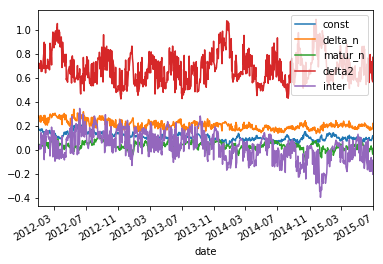

In [30]:
mB.loc['SPX']['params'].plot()

## 4.3 Need for speed

### 4.3.1 Just for coefficients, sequential

In [43]:
def CrossRegSpeed(df,exogs):
    mB = np.linalg.lstsq(df[exogs],df['imvol'])[0]
    return pd.Series(mB,index=exogs)
mB = clean.groupby(['ticker','date']).apply(lambda x:CrossRegSpeed(x,exogs))

### 4.3.2 Just for coefficients, parallel

In [32]:
import multiprocessing as mp
from functools import partial

def CrossRegParHelper(ticker):
    tmp = DATA[DATA['ticker']==ticker]
    mB = tmp.groupby(['date']).apply(lambda x:CrossRegSpeed(x,EXOGS))
    mB['ticker'] = ticker
    return mB

def CrossRegPar(data,exogs):
    global DATA, EXOGS
    DATA = data 
    EXOGS = exogs
    pool = mp.Pool(processes=12)
    results = pool.map(CrossRegParHelper, tickers)
    pool.close()
    pool.join()
    mB = pd.concat(results)
    return mB

mB = CrossRegPar(clean,exogs)

In [33]:
%timeit clean.groupby(['ticker','date']).apply(lambda x:CrossRegSpeed(x,exogs))

4.99 s ± 92.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
%timeit CrossRegPar(clean,exogs)

6.54 s ± 333 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 4.3.3 JIT compilation

In [35]:
import numba as nb

In [36]:
clean.sort_values(by=['ticker','date'],inplace=True)
locs = clean.groupby(['ticker','date']).size().values.cumsum()
locs = np.insert(locs,0,0)
mY = clean[['imvol']].values
mX = clean[exogs].values

In [37]:
@nb.jit
def CrossRegJIT(mX,mY,locs):
    N = locs.shape[0]
    mB = np.zeros((mX.shape[1],N-1))
    for i in range(0,N-1):
        b = np.linalg.lstsq(mX[locs[i]:locs[i+1]],mY[locs[i]:locs[i+1]])[0]
        mB[:,[i]] = b
    return mB

mB = CrossRegJIT(mX,mY,locs)

In [38]:
%timeit CrossRegJIT(mX,mY,locs)

702 ms ± 6.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
mB = pd.DataFrame(mB.T,index=clean.groupby(['ticker','date']).size().index,columns=exogs)

In [40]:
mB

const  delta_n  matur_n  delta2  inter
ticker date                                              
COF    2012-01-03  0.272    0.176   -0.170   0.920  0.054
       2012-01-04  0.288    0.079   -0.090   1.023 -0.263
       2012-01-05  0.288    0.160   -0.129   0.776 -0.110
       2012-01-06  0.251    0.246   -0.149   1.189  0.076
       2012-01-09  0.267    0.176   -0.167   0.881  0.312
       2012-01-10  0.267    0.126   -0.096   0.914 -0.102
       2012-01-11  0.264    0.240   -0.180   0.690  0.370
       2012-01-12  0.268    0.151   -0.204   0.808  0.161
       2012-01-13  0.244    0.223   -0.272   0.928  0.385
       2012-01-17  0.289    0.194    0.025   1.009 -0.338
       2012-01-18  0.296    0.081    0.016   0.811 -0.438
       2012-01-19  0.282    0.125   -0.013   0.922 -0.322
       2012-01-20  0.278    0.130    0.055   0.983 -0.095
       2012-01-23  0.275    0.187    0.055   0.882  0.095
       2012-01-24  0.277    0.274    0.076   0.918  0.149
       2012-01-25  0.273    0.144   -0.006   0.768 -0.058
       2012-01-26  0.271    0.224   -0.001   0.787 -0.041
       2012-01-27  0.279    0.131   -0.011   0.692 -0.025
       2012-01-30  0.269    0.226   -0.019   1.001 -0.020
       2012-01-31  0.288    0.132   -0.026   0.645 -0.044
       2012-02-01  0.279    0.129   -0.035   0.772 -0.040
       2012-02-02  0.261    0.194   -0.025   0.822 -0.181
       2012-02-03  0.263    0.148   -0.014   0.751 -0.065
       2012-02-06  0.267    0.256   -0.003   0.871 -0.023
       2012-02-07  0.264    0.245   -0.047   0.937  0.076
       2012-02-08  0.275    0.137   -0.034   0.712 -0.052
       2012-02-09  0.278    0.118   -0.045   0.713 -0.079
       2012-02-10  0.283    0.197   -0.059   0.759 -0.023
       2012-02-13  0.284    0.214   -0.030   0.802  0.001
       2012-02-14  0.295    0.214   -0.031   0.674 -0.034
       2012-02-15  0.284    0.247   -0.024   0.793 -0.068
       2012-02-16  0.303    0.131   -0.044   0.567  0.074
       2012-02-17  0.277    0.229   -0.025   0.763 -0.235
       2012-02-21  0.272    0.200   -0.003   0.743 -0.041
       2012-02-22  0.261    0.274   -0.009   0.930 -0.042
       2012-02-23  0.269    0.128    0.004   0.744  0.132
       2012-02-24  0.261    0.157   -0.011   0.673  0.061
       2012-02-27  0.257    0.134   -0.034   0.874  0.090
       2012-02-28  0.266    0.147    0.003   0.636  0.048
       2012-02-29  0.247    0.240    0.028   0.764  0.027
       2012-03-01  0.244    0.255    0.049   0.836  0.034
       2012-03-02  0.246    0.279    0.051   0.845 -0.027
       2012-03-05  0.258    0.245    0.008   0.790  0.034
       2012-03-06  0.279    0.315    0.022   0.805 -0.037
       2012-03-07  0.290    0.175    0.030   0.534 -0.003
       2012-03-08  0.275    0.146    0.032   0.664  0.136
       2012-03-09  0.268    0.178    0.042   0.636  0.040
       2012-03-12  0.256    0.297    0.023   0.879 -0.135
       2012-03-13  0.255    0.141    0.007   0.646 -0.038
       2012-03-14  0.238    0.186    0.024   0.791 -0.118
...                  ...      ...      ...     ...    ...
XOM    2015-06-22  0.112    0.109    0.029   0.585 -0.087
       2015-06-23  0.132    0.092    0.032   0.376  0.220
       2015-06-24  0.109    0.192   -0.011   0.665 -0.007
       2015-06-25  0.109    0.206   -0.080   0.660 -0.107
       2015-06-26  0.143    0.082    0.032   0.380  0.152
       2015-06-29  0.123    0.218   -0.051   0.664  0.089
       2015-06-30  0.140    0.211   -0.002   0.522  0.310
       2015-07-01  0.143    0.261    0.007   0.621  0.359
       2015-07-02  0.102    0.079   -0.084   0.677  0.194
       2015-07-06  0.146    0.139   -0.024   0.444  0.219
       2015-07-07  0.138    0.079   -0.058   0.548  0.200
       2015-07-08  0.115    0.261   -0.113   0.755  0.370
       2015-07-09  0.116    0.268   -0.141   0.743  0.253
       2015-07-10  0.120    0.178   -0.061   0.527  0.374
       2015-07-13  0.113    0.147   -0.079   0.456  0.233
       2015-07-14  0.084    0.040   -0.096   0.674  0.002
       2015-07-15

# 4. Principal Component Analysis

In [44]:
mB.reset_index(inplace=True)
level = pd.pivot_table(mB,index='date',columns='ticker',values='const')

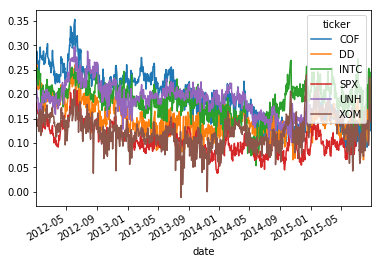

In [46]:
level.plot()

In [47]:
from sklearn import preprocessing
import scipy as sp
def pcaAnalysis(mX, iPC, useCov=1):
    if useCov:
        # mCov = np.cov(mX, rowvar = 0)
        de_meanX = mX - np.tile(np.mean(mX, axis=0), [mX.shape[0], 1])
        mCov = np.dot(de_meanX.transpose(), de_meanX) / mX.shape[0]

        eigval, eigvec = sp.linalg.eigh(mCov)
        eigidx = np.argsort(eigval)
        maxidx = eigidx[::-1]
        sorted_vec = eigvec[:, maxidx]

        mPC = np.dot(de_meanX, sorted_vec)
        return mPC[:, 0:iPC], (eigval[maxidx] / np.sum(eigval))[0:iPC]

    else:
        mCoef = np.corrcoef(mX, rowvar=0)
        scaled_X = preprocessing.scale(mX)
        eigval, eigvec = sp.linalg.eigh(mCoef)

        eigidx = np.argsort(eigval)
        maxidx = eigidx[::-1]
        sorted_vec = eigvec[:, maxidx]

        mPC = np.dot(scaled_X, sorted_vec)
        return preprocessing.scale(mPC[:, 0:iPC]), (eigval[maxidx] /
                                                    np.sum(eigval))[0:iPC]

In [54]:
mPC,pct = pcaAnalysis(level.values[:500],3)
pct

array([  7.22e-01,   9.53e-02,   6.82e-02])

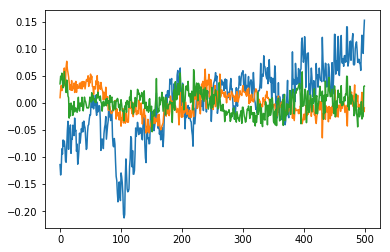

In [53]:
plt.plot(mPC)